<a href="https://colab.research.google.com/github/Yotty0404/A-Puzzle-A-Day-Solver/blob/main/A_Puzzle_A_Day_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

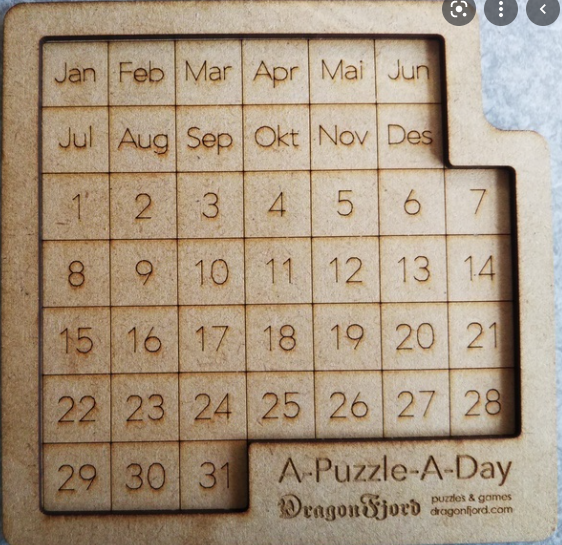

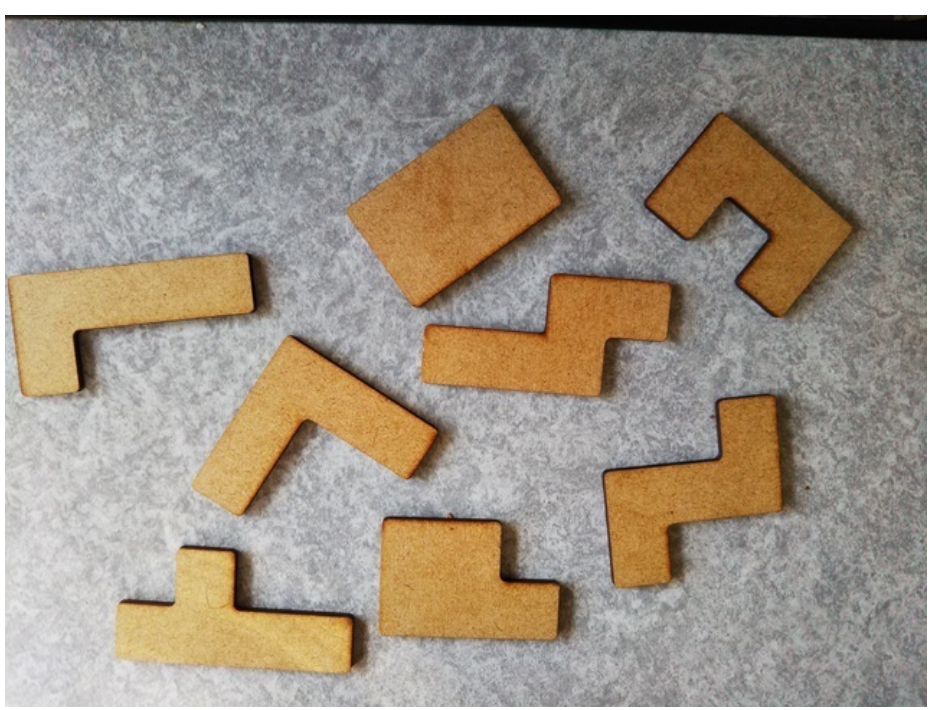

In [ ]:
# Union-Find木
from collections import defaultdict
class UnionFind():
    def __init__(self, n):
        self.n = n
        self.parents = [-1] * n

    def find(self, x):
        if self.parents[x] < 0:
            return x
        else:
            self.parents[x] = self.find(self.parents[x])
            return self.parents[x]

    def union(self, x, y):
        x = self.find(x)
        y = self.find(y)

        if x == y:
            return

        if self.parents[x] > self.parents[y]:
            x, y = y, x

        self.parents[x] += self.parents[y]
        self.parents[y] = x

    def size(self, x):
        return -self.parents[self.find(x)]

    def same(self, x, y):
        return self.find(x) == self.find(y)

    def members(self, x):
        root = self.find(x)
        return [i for i in range(self.n) if self.find(i) == root]

    def roots(self):
        return [i for i, x in enumerate(self.parents) if x < 0]

    def group_count(self):
        return len(self.roots())

    def all_group_members(self):
        group_members = defaultdict(list)
        for member in range(self.n):
            group_members[self.find(member)].append(member)
        return group_members

    def __str__(self):
        return '\n'.join(f'{r}: {m}' for r, m in self.all_group_members().items())

In [ ]:
import numpy as np
from itertools import product

# ブロックを回転させる関数
def rotate_block(block, num):
    if num == 0:
        return block
    if num == 1:
        return np.rot90(block,1)
    if num == 2:
        return np.rot90(block,2)
    if num == 3:
        return np.rot90(block,3)
    if num == 4:
        block = np.fliplr(block)
        return block
    if num == 5:
        block = np.fliplr(block)
        return np.rot90(block,1)
    if num == 6:
        block = np.fliplr(block)
        return np.rot90(block,2)
    if num == 7:
        block = np.fliplr(block)
        return np.rot90(block,3)

# 重複なく回転パターンを洗い出す関数
def get_rotate_num(block):
    l = []
    num_l = []
    for i in range(8):
        array1 = rotate_block(block,i)
        flag = True
        for array2 in l:
            if array1.shape == array2.shape and np.allclose(array1,array2):
                flag = False
        
        if flag:
            l.append(array1)
            num_l.append(i)
    return num_l

# 次のブロックの位置候補を返す関数
def get_next_postion(block, position):
    if position is None:
        return [0,0]

    max_r = 7-block.shape[0]
    max_c = 7-block.shape[1]

    position[1]+=1

    if position[1] > max_c:
        position[0]+=1
        position[1]=0
    
    if position[0] > max_r:
        return [-1,-1]
    
    return position

# 指定された位置から探索して、ブロックの置く位置を探索する関数
def get_position(board, block, position):
    while 1:
        position = get_next_postion(block, position)
        if position[0] == -1:
            return [-1,-1]
    
        r = position[0]
        c = position[1]

        temp = np.copy(board)
        temp[r:r+block.shape[0],c:c+block.shape[1]] += block

        if(judge_correct_board(temp)):
            return [r,c]

# 残るマスの連結成分が5の倍数かどうか判定する関数
def judge_connected_component(board):
    uf = UnionFind(49)

    for i in range(7):
        for j in range(7):
            if i != 6 and board[i][j]==board[i+1][j]==0:
                uf.union(i*7+j,(i+1)*7+j)
            if j != 6 and board[i][j]==board[i][j+1]==0:
                uf.union(i*7+j,i*7+j+1)

    for i in range(7):
        for j in range(7):
            if board[i][j]==0 and uf.size(i*7+j)%5!=0:
                return False

    return True

# ボードの状態を見て、継続可能か判定する関数
def judge_correct_board(board):
    if np.amax(board) > 1:
        return False
    if not judge_connected_component(board):
        return False
    return True

# ボードの指定の位置にブロックを置いた時のボードの状態を返す関数
def get_board_state(board, block, position):
    r = position[0]
    c = position[1]
    board[r:r+block.shape[0],c:c+block.shape[1]] += block
    return board

# 現在のボードの状態を返す関数
def get_board_state_by_all_block(initial_board, blocks, positions, block_num):
    board = np.copy(initial_board)
    for i in range(block_num+1):
        board = get_board_state(board, blocks[i],positions[i])
    return board

# 指定したブロックの番号移行の位置を初期化する関数
def clear_block_position(positions, block_num):
    for i in range(block_num+1, 8):
        positions[i] = None
    return positions




# ボードの左上から探索して、ブロックの置く位置を探索する関数
def get_first_position(board, block):
    max_r = 8-block.shape[0]
    max_c = 8-block.shape[1]
    
    for r,c in product(range(max_r),range(max_c)):
        temp = np.copy(board)
        temp[r:r+block.shape[0],c:c+block.shape[1]] += block

        if(judge_correct_board(temp)):
            return [r,c]

    #置ける位置が見つからない場合
    return [-1,-1]

In [ ]:
# 2進数で実装

initial_board =np.array([[0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,1,1,1,1],
                 ])

# ブロックの種類
initial_blocks = [
    np.array([
        [1, 1, 1],
        [1, 1, 1]]),
    np.array([
        [0, 0, 1, 1],
        [1, 1, 1, 0]]),
    np.array([
        [0, 0, 1, 0],
        [1, 1, 1, 1]]),
    np.array([
        [0, 0, 0, 1],
        [1, 1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [0, 1, 0],
        [0, 1, 1]]),
    np.array([
        [1, 0, 1],
        [1, 1, 1]]),
    np.array([
        [1, 0, 0],
        [1, 0, 0],
        [1, 1, 1]]),
]

# 各ブロックの回転パターンを保持
l_num = []
for b in initial_blocks:
    l_num.append(get_rotate_num(b))

print(l_num)

for i in range(1):
    rotates = l_num[i]
    l_bin = []

    for rotate in rotates:
        block = rotate_block(initial_blocks[i], rotates[i])
        position = [0,0]
        while position[0] != -1:
            board = np.copy(initial_board)
            get_board_state(board, block, position)

            print(position)
            print(board)

            position = get_next_postion(block, position)


[[0, 1], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 4, 5], [0, 1, 2, 3], [0, 1, 2, 3]]
[0, 0]
[[1 1 1 0 0 0 1]
 [1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1]]
[0, 1]
[[0 1 1 1 0 0 1]
 [0 1 1 1 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1]]
[0, 2]
[[0 0 1 1 1 0 1]
 [0 0 1 1 1 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1]]
[0, 3]
[[0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1]]
[0, 4]
[[0 0 0 0 1 1 2]
 [0 0 0 0 1 1 2]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1]]
[1, 0]
[[0 0 0 0 0 0 1]
 [1 1 1 0 0 0 1]
 [1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1]]
[1, 1]
[[0 0 0 0 0 0 1]
 [0 1 1 1 0 0 1]
 [0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 

In [ ]:
import numpy as np
import datetime
from itertools import product

initial_board =np.array([[0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,1,1,1,1],
                 ])


date = datetime.date.today()
date = datetime.date(2000, 5, 28)

# 月の位置を取得
r = (date.month-1) // 6
c = (date.month-1) % 6
initial_board[r][c] = 1

# 日の位置を取得
r = (date.day-1) // 7 + 2
c = (date.day-1) % 7
initial_board[r][c] = 1

# ブロックの種類
initial_blocks = [
    np.array([
        [1, 1, 1],
        [1, 1, 1]]),
    np.array([
        [0, 0, 1, 1],
        [1, 1, 1, 0]]),
    np.array([
        [0, 0, 1, 0],
        [1, 1, 1, 1]]),
    np.array([
        [0, 0, 0, 1],
        [1, 1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [0, 1, 0],
        [0, 1, 1]]),
    np.array([
        [1, 0, 1],
        [1, 1, 1]]),
    np.array([
        [1, 0, 0],
        [1, 0, 0],
        [1, 1, 1]]),
]

# 各ブロックの回転パターンを保持
l_num = []
for b in initial_blocks:
    l_num.append(get_rotate_num(b))


print(datetime.datetime.now())

# 各ブロックの全組み合わせループ
for l in product(l_num[0], l_num[1], l_num[2], l_num[3], l_num[4], l_num[5], l_num[6], l_num[7]):
    #回転させたブロックを保持
    blocks = []
    for i in range(8):
        blocks.append(rotate_block(initial_blocks[i], l[i]))
    
    # 各ブロックの位置を保持するリスト
    positions = [None, None, None, None, None, None, None, None]
    # 現在置く場所を判断しているブロックの番号を保持
    block_num = 0

    board = np.copy(initial_board)

    while 1:
        cnt+=1
        position = get_position(board, blocks[block_num], positions[block_num])

        if position[0] == -1:
            block_num -= 1
            positions = clear_block_position(positions, block_num)

            # ブロックの番号の1つ前までのブロックを置いた状態のボードを取得
            board = get_board_state_by_all_block(initial_board, blocks, positions, block_num-1)

            if block_num == -1:
                break

            continue
        
        positions[block_num] = position
        board = get_board_state_by_all_block(initial_board, blocks, positions, block_num)

        block_num+=1
        if block_num == 8:
            break

    if block_num == 8:
            break

print(datetime.datetime.now())
for i in range(8):
    print(positions[i])
    print(blocks[i])
    print()

2021-08-21 19:41:18.262582
2021-08-21 19:50:23.865501
[5, 0]
[[1 1 1]
 [1 1 1]]

[4, 3]
[[0 0 1 1]
 [1 1 1 0]]

[3, 0]
[[0 0 1 0]
 [1 1 1 1]]

[0, 0]
[[1 1 1 1]
 [0 0 0 1]]

[0, 4]
[[0 1]
 [1 1]
 [1 1]]

[2, 4]
[[0 0 1]
 [1 1 1]
 [1 0 0]]

[2, 1]
[[1 1 1]
 [1 0 1]]

[1, 0]
[[1 1 1]
 [1 0 0]
 [1 0 0]]



In [ ]:
import numpy as np


# l = [0,0,2,0,6,5,3,1]


board =np.array([[0,0,0,0,1,0,1],
                 [1,1,1,0,0,0,1],
                 [1,1,1,0,0,1,1],
                 [0,0,1,1,1,0,0],
                 [0,0,1,1,0,0,0],
                 [0,0,1,1,0,1,0],
                 [0,0,0,1,1,1,1],
                 ])

# 残るマスの連結成分が5の倍数かどうか判定する関数
def judge_connected_component(board):
    uf = UnionFind(49)
    rtn = True

    for i in range(7):
        for j in range(7):
            if i != 6 and board[i][j]==board[i+1][j]==0:
                uf.union(i*7+j,(i+1)*7+j)
            if j != 6 and board[i][j]==board[i][j+1]==0:
                uf.union(i*7+j,i*7+j+1)
    

    L = [[-1 for i in range(7)] for j in range(7)]
    print(L)
    for i in range(7):
        for j in range(7):
            if board[i][j] == 0:
                L[i][j] = uf.size(i*7+j)
    for i in range(7):
        print(L[i])


    for i in range(7):
        for j in range(7):
            if board[i][j]==0 and uf.size(i*7+j)%5!=0:
                return False
    
    return rtn

print(judge_connected_component(board))


[[-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1]]
[10, 10, 10, 10, -1, 10, -1]
[-1, -1, -1, 10, 10, 10, -1]
[-1, -1, -1, 10, 10, -1, -1]
[9, 9, -1, -1, -1, 7, 7]
[9, 9, -1, -1, 7, 7, 7]
[9, 9, -1, -1, 7, -1, 7]
[9, 9, 9, -1, -1, -1, -1]
False


0 2
4 5

0 3
5 5

1 0
2 4

1 1
3 4

1 2
4 4



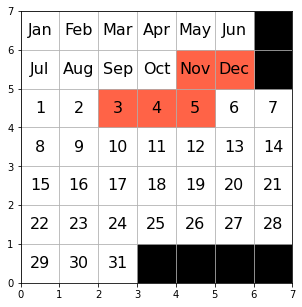

In [ ]:
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.xlim(0,7)
plt.ylim(0,7)

ax.set_aspect('equal', adjustable='box')
ax.grid()

dt = datetime.date(2000, 1, 1)


ax.axvspan(6,7,5/7,7/7, color = "black", alpha = 1)
ax.axvspan(3,7,0/7,1/7, color = "black", alpha = 1)
# 月の描画
for i in range(6):
    nm = dt + relativedelta(months=i)
    m = nm.strftime('%b')
    ax.text(0.5+i, 6.5, m, fontsize=16,
                           verticalalignment="center",
                           horizontalalignment="center")
for i in range(6):
    nm = dt + relativedelta(months=6+i)
    m = nm.strftime('%b')
    ax.text(0.5+i, 5.5, m, fontsize=16,
                           verticalalignment="center",
                           horizontalalignment="center")
    
# 日の描画
for i in range(31):
    x = 0.5 + i%7
    y = 0.5 + abs(4-i//7)
    ax.text(x, y, str(i+1), fontsize=16,
                           verticalalignment="center",
                           horizontalalignment="center")
    

initial_blocks = [
    np.array([
        [1, 1, 1],
        [1, 1, 1]]),
    np.array([
        [0, 0, 1, 1],
        [1, 1, 1, 0]]),
    np.array([
        [0, 0, 1, 0],
        [1, 1, 1, 1]]),
    np.array([
        [0, 0, 0, 1],
        [1, 1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [0, 1, 0],
        [0, 1, 1]]),
    np.array([
        [1, 0, 1],
        [1, 1, 1]]),
    np.array([
        [1, 0, 0],
        [1, 0, 0],
        [1, 1, 1]]),
]

block = initial_blocks[1]
position = [1,2]

if position is not None:
    x_size = block.shape[0]
    y_size = block.shape[1]

    for i in range(x_size):
        for j in range(y_size):
            if block[i][j] == 0:
                continue
            
            print(i,j)
            x = position[1] + j
            y = abs(position[0] + i - 6)
            print(x,y)
            print()
            ax.axvspan(x,x+1,y/7,(y+1)/7, color = "tomato", alpha = 1)
